In [ ]:
!git clone https://github.com/mahajanajinkya/teeth_detection_major_project.git

Cloning into 'teeth_detection_major_project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [ ]:
import sys
sys.path.append("/content/teeth_detection_major_project")

In [ ]:
%cd /content/teeth_detection_major_project/

/content/teeth_detection_major_project


In [ ]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

Downloading...
Completed...


In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [ ]:
from masks_prepare import *
Y=pre_splitted_masks(path='/content/teeth_detection_major_project/Custom_Masks')

In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [ ]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

15


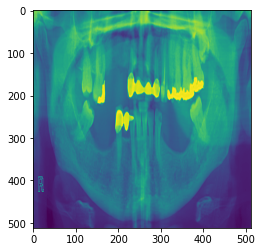

In [ ]:
plt.imshow(x_train[random_number,:,:,0])

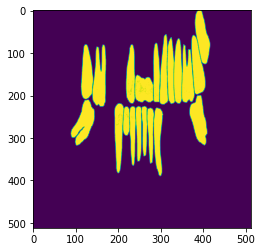

In [ ]:
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train,y_train,batch_size=8,epochs=150,verbose=1)

Epoch 1/150
14/14 [==============================] - 62s 3s/step - loss: 0.5307 - accuracy: 0.6863
Epoch 2/150
14/14 [==============================] - 33s 2s/step - loss: 0.3134 - accuracy: 0.8197
Epoch 3/150
14/14 [==============================] - 33s 2s/step - loss: 0.1948 - accuracy: 0.8657
Epoch 4/150
14/14 [==============================] - 33s 2s/step - loss: 0.1596 - accuracy: 0.8786
Epoch 5/150
14/14 [==============================] - 33s 2s/step - loss: 0.1416 - accuracy: 0.8849
Epoch 6/150
14/14 [==============================] - 33s 2s/step - loss: 0.1296 - accuracy: 0.8885
Epoch 7/150
14/14 [==============================] - 33s 2s/step - loss: 0.1237 - accuracy: 0.8913
Epoch 8/150
14/14 [==============================] - 33s 2s/step - loss: 0.1230 - accuracy: 0.8902
Epoch 9/150
14/14 [==============================] - 33s 2s/step - loss: 0.1191 - accuracy: 0.8924
Epoch 10/150
14/14 [==============================] - 33s 2s/step - loss: 0.1136 - accuracy: 0.8938
Epoch 11/

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[1,:,:,0] 

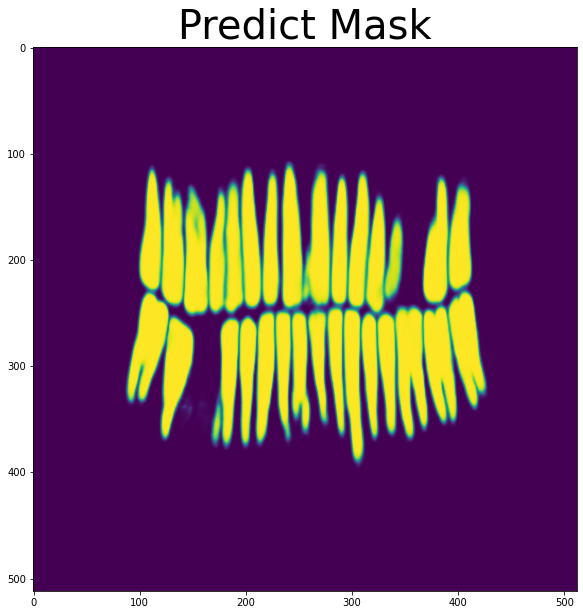

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

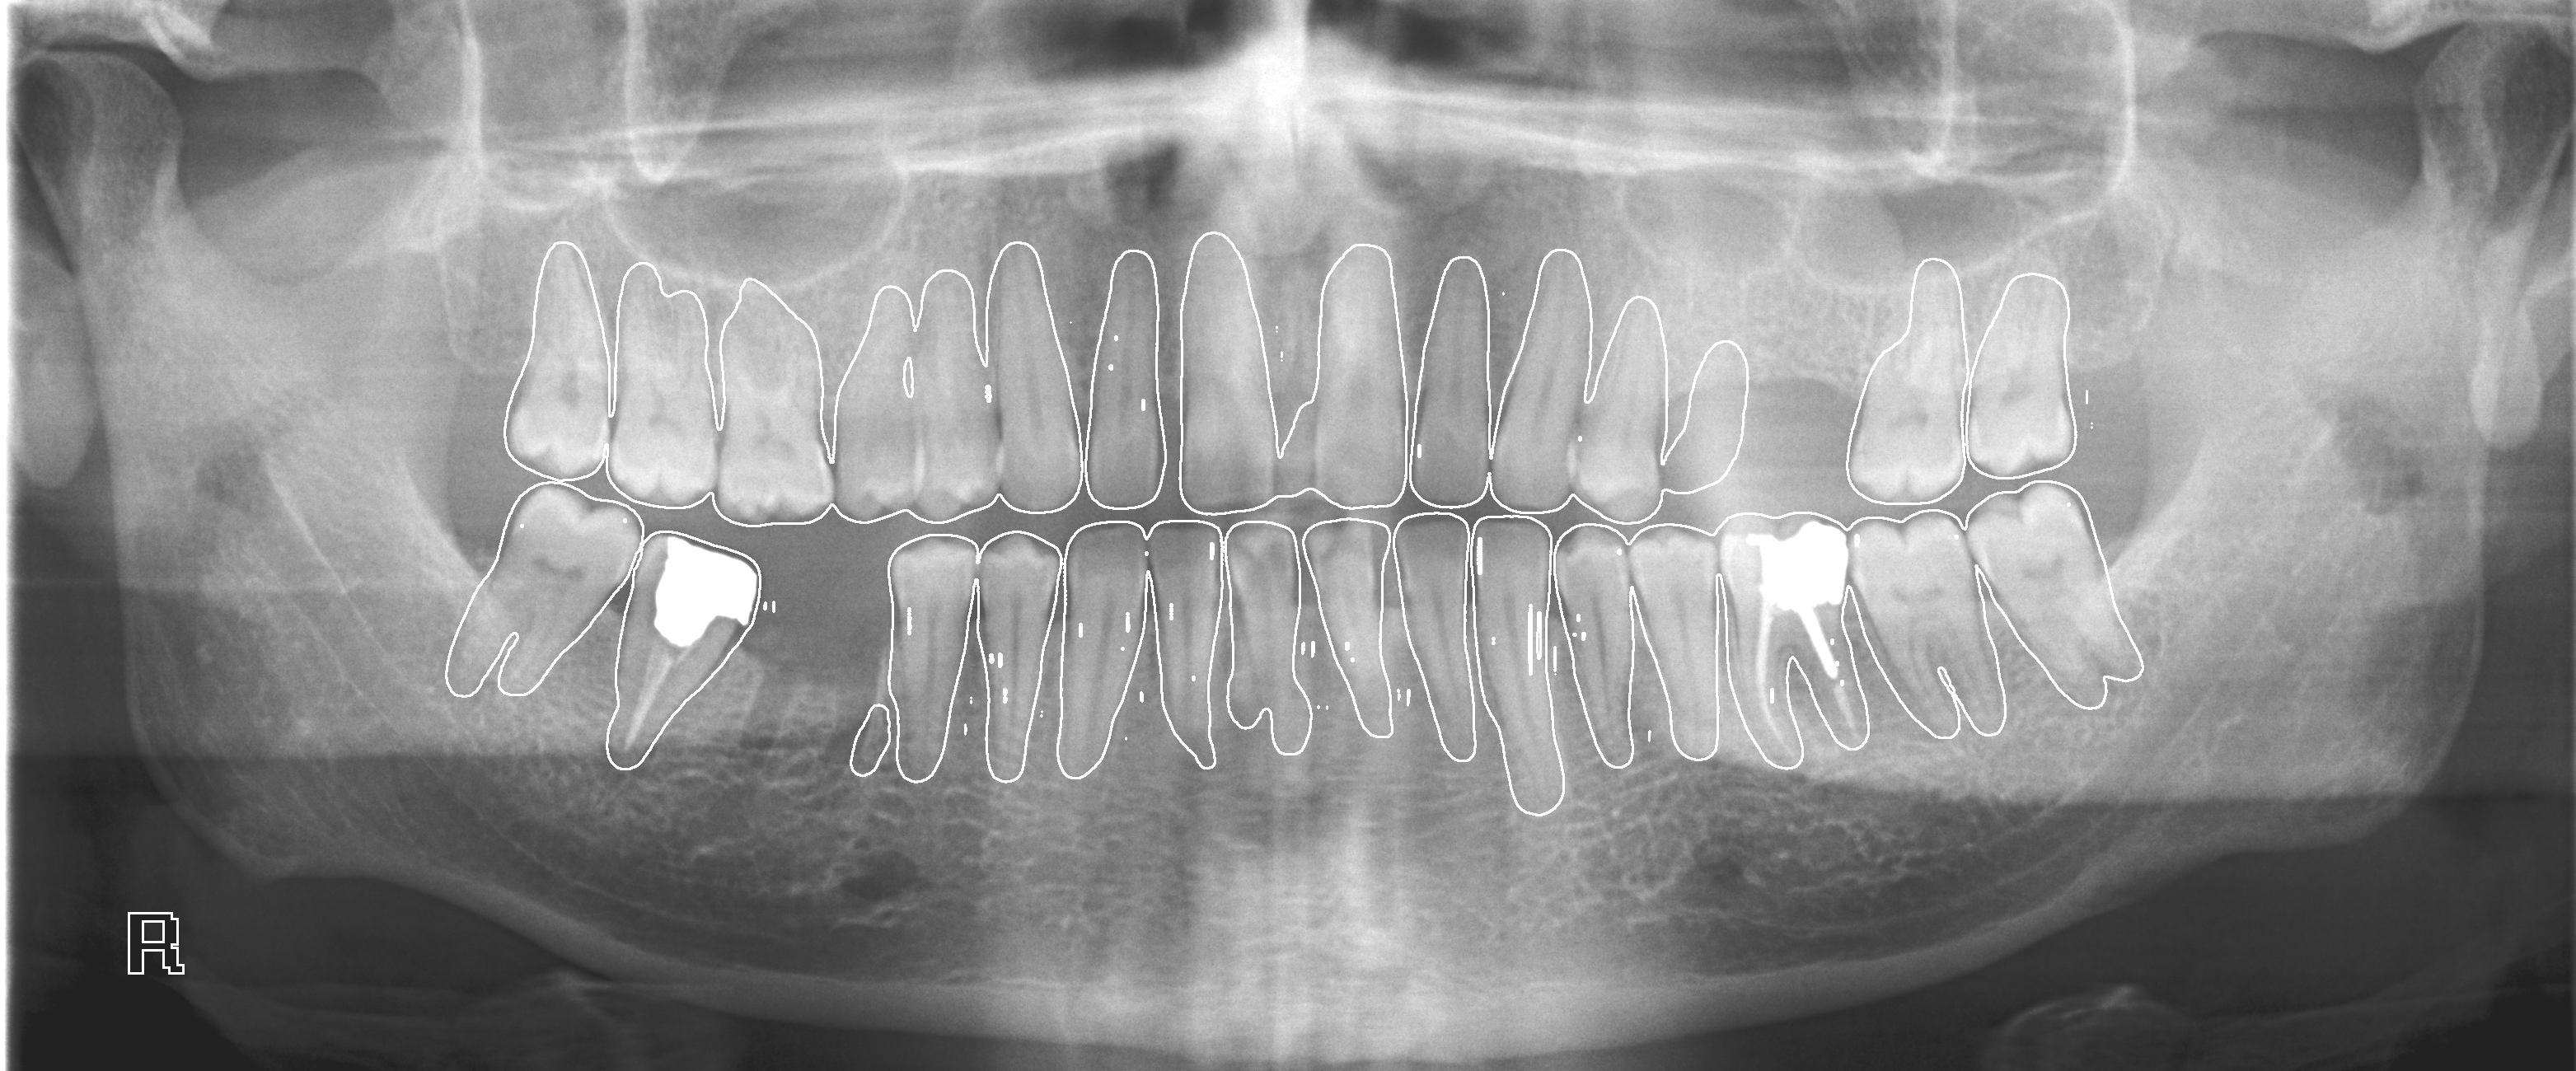

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)

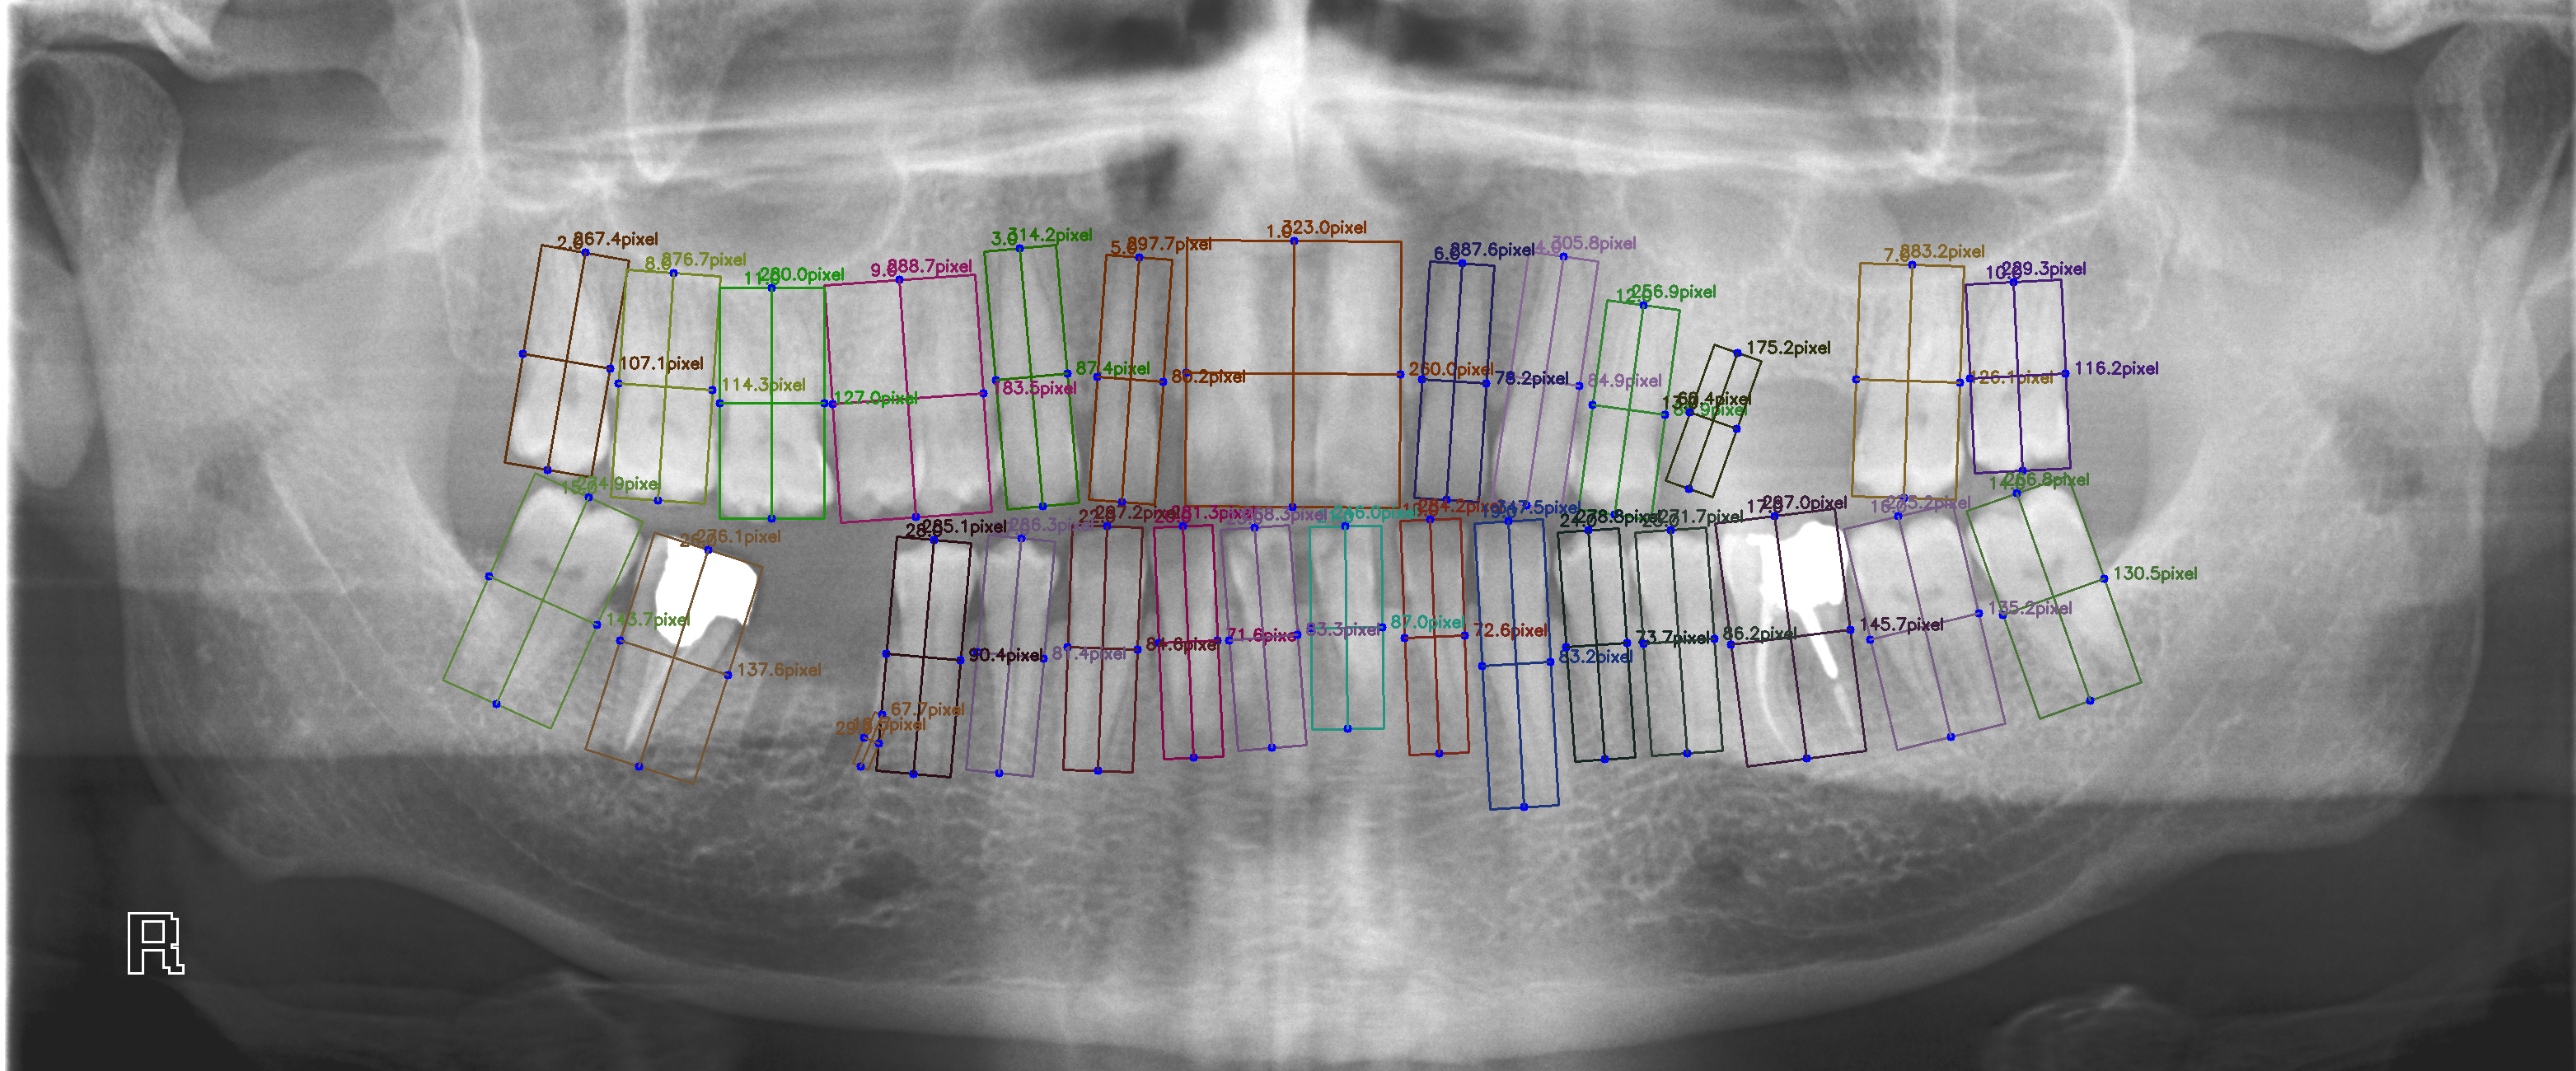

In [33]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

#load image (mask was saved by matplotlib.pyplot) 
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

In [34]:
print(teeth_count,"Teeth Count")

28 Teeth Count
